In [166]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

## Intro to dataset 

What is the problem? For loan provider it is important to ensure that people who get the loan can make the payment and don't default, however it is equally important that people are not denied a loan due to a model trained on poor quality data. 

We will read the data using pandas `read_csv` method

In [167]:
# Reading the data
df = pd.read_csv('../dataset/loan_prediction.csv')

"""Lets check the first 5 rows of the dataset. By adding the T at the end the column names will be represented as rows 
and the first 5 rows will be represented as columns"""
df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [168]:
# Lets also look at the high level stats of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [169]:
# Lets explore the distribution of all numerical columns.
# We will first extract the id column and the target column
id_col = 'Loan_ID'
target = 'Loan_Status'
cat_cols = [cols for cols in df if df[cols].dtype == 'object' and cols not in [id_col, target]]
num_cols = [cols for cols in df if cols not in cat_cols + [id_col, target]]

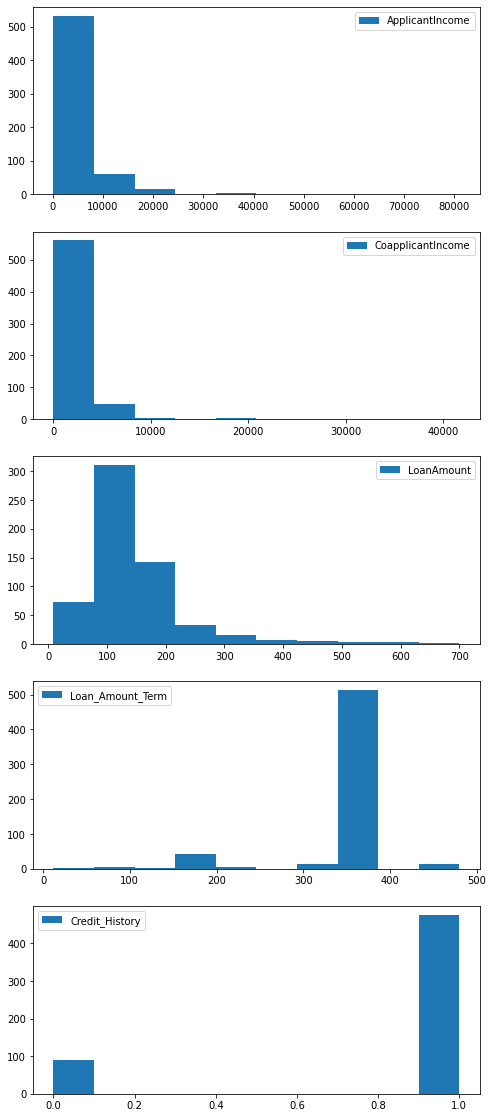

In [170]:
# Plotting distribution
fig, ax = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8,20))
for cols, plot in zip(num_cols, ax):
    plot.hist(x=df[cols], bins=10, label=f"{cols}")
    plot.legend()

In [171]:
# The Loan amount is scaled down and represented in 1000s, we should either scale this up or scale ApplicationIncome and Coapplicationincome down
df.LoanAmount = df.LoanAmount*1000

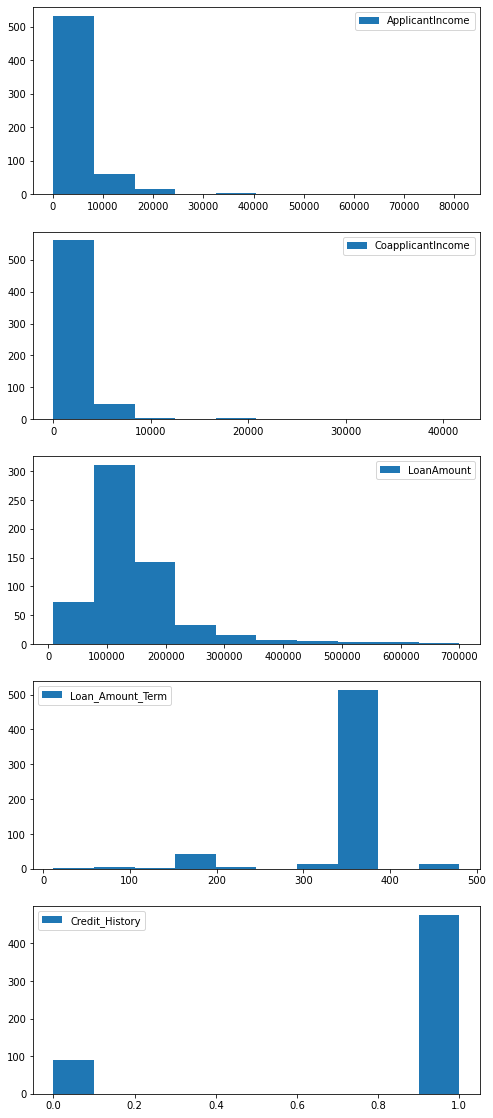

In [172]:
# Plotting distribution
fig, ax = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8,20))
for cols, plot in zip(num_cols, ax):
    plot.hist(x=df[cols], bins=10, label=f"{cols}")
    plot.legend()

In [173]:
# Lets also check some numerical values have few unique values, then can be converted into categorical
for cols in num_cols:
    print(f"{cols} has n unique values compared to total values of {df.shape[0]}")
    print(df[cols].nunique())
    print()

ApplicantIncome has n unique values compared to total values of 614
505

CoapplicantIncome has n unique values compared to total values of 614
287

LoanAmount has n unique values compared to total values of 614
203

Loan_Amount_Term has n unique values compared to total values of 614
10

Credit_History has n unique values compared to total values of 614
2



In [174]:
# Its clear that the Loan_Amount_Term and Credit_History can be converted into categorical columns

In [175]:
# Lets explore these and convert them
print(df.Loan_Amount_Term.unique())
# The loan amount term is in number of months
print()
print(df.Credit_History.unique())
# Credit history is in binary so can be converted into Yes or No


[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]

[ 1.  0. nan]


In [176]:
# Since NaNs cannot be converted to integers, hence we will leave missing value as is
df.Loan_Amount_Term = df.Loan_Amount_Term.apply(lambda val: f'Month_{str(int(val/12))}' if str(val) != 'nan'  else val)

In [177]:
# Creating the mapping for the credit history column and making it categorical
df.Credit_History = df.Credit_History.map({
    1.0: 'Yes',
    0.0: 'No'
})

In [178]:
# We will re run these as we have made some categorical
cat_cols = [cols for cols in df if df[cols].dtype == 'object' and cols not in [id_col, target]]
num_cols = [cols for cols in df if cols not in cat_cols + [id_col, target]]

In [179]:
# The column names are inconsistent, lets make them clean

In [180]:
#Getting the column names
column_names = [cols for cols in df]
print(column_names)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [181]:
# We will now update the column names by adding underscore in long column names
df = df.rename(columns={'ApplicantIncome':'Applicant_Income', 
                        "CoapplicantIncome":"Co_Application_Income", 
                        "LoanAmount":"Loan_Amount"}
              )

In [182]:
# We will now make all columns lower case and in the next step update the columns
print([cols.lower() for cols in df])

['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'co_application_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']


In [183]:
# Putting it together and updating the column names
df.columns = [cols.lower() for cols in df]
print(df.columns)

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'co_application_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')


Within the data we can also see some categorical columns have data in in camel case and some data is separated by spaces and other times is separated by underscores. For instance `Gender` column has data in camel case, where the first letter is Upper and remaining characters are lower. Sometimes we can have inconsistencies within the same column. What happens if gender column has two distinct values for male customers, `Male` and `male`. If we don't treat this, then our machine learning model will consider `male` data points separate to `Male`, and the model will not get an accurate signal. We also have a education column, where data value of `Not Graduate` is separated by space. To ensure data consitency we must convert all data to lower case and replace spaces with underscores

In [184]:
id_col = 'loan_id'
target = 'loan_status'
cat_cols = [cols for cols in df if df[cols].dtype == 'object' and cols not in [id_col, target]]
num_cols = [cols for cols in df if cols not in cat_cols + [id_col, target]]

In [185]:
# Lets iterate it over each categorical column and print the values
for col in cat_cols:
    print(f'Unique values for {col} column are: \n {df[col].unique()} \n\n')

Unique values for gender column are: 
 ['Male' 'Female' nan] 


Unique values for married column are: 
 ['No' 'Yes' nan] 


Unique values for dependents column are: 
 ['0' '1' '2' '3+' nan] 


Unique values for education column are: 
 ['Graduate' 'Not Graduate'] 


Unique values for self_employed column are: 
 ['No' 'Yes' nan] 


Unique values for loan_amount_term column are: 
 ['Month_30' 'Month_10' 'Month_20' nan 'Month_15' 'Month_5' 'Month_25'
 'Month_40' 'Month_3' 'Month_7' 'Month_1'] 


Unique values for credit_history column are: 
 ['Yes' 'No' nan] 


Unique values for property_area column are: 
 ['Urban' 'Rural' 'Semiurban'] 




In [186]:
# We can see the graduate column has two values , if they are a graduate or not. We can change the column from education to graduate and change the mapping to Yes or No
# Lets rename the columns and then lets apply 
df = df.rename(columns={'education':'graduate'})
df.graduate = df.graduate.map({'Graduate': 'Yes', 'Not Graduate': 'No'})

cat_cols = [cols for cols in df if df[cols].dtype == 'object' and cols not in [id_col, target]]
num_cols = [cols for cols in df if cols not in cat_cols + [id_col, target]]

In [187]:
# Lets make the rest of the data consistent
def make_data_consistent(df, cols) -> pd.DataFrame:
    """Function to make data consistent and meaningful"""
    
    df = df.copy()
    
    for col in cols:
           
        # making all values lower case
        df[col] = df[col].apply(lambda val: val.lower() if isinstance(val, str) else val)

        # removing whitespace and '-' and replacing with '_'
        df[col] = df[col].apply(lambda val: val.replace('-','_').replace(' ','_') if isinstance(val, str) else val)
            
    
    # property_area column applying the custom update
    df['property_area'] = df['property_area'].map({
            'semiurban': 'semi_urban',
            'rural': 'rural',
            'urban': 'urban'
            })
    
    return df
    

df = make_data_consistent(df=df, cols=cat_cols+[id_col, target])

In [188]:
# Lets iterate it over each categorical column and print the values
for col in cat_cols:
    print(f'Unique values for {col} column are: \n {df[col].unique()} \n\n')

Unique values for gender column are: 
 ['male' 'female' nan] 


Unique values for married column are: 
 ['no' 'yes' nan] 


Unique values for dependents column are: 
 ['0' '1' '2' '3+' nan] 


Unique values for graduate column are: 
 ['yes' 'no'] 


Unique values for self_employed column are: 
 ['no' 'yes' nan] 


Unique values for loan_amount_term column are: 
 ['month_30' 'month_10' 'month_20' nan 'month_15' 'month_5' 'month_25'
 'month_40' 'month_3' 'month_7' 'month_1'] 


Unique values for credit_history column are: 
 ['yes' 'no' nan] 


Unique values for property_area column are: 
 ['urban' 'rural' 'semi_urban'] 




In [190]:
# We can now convert all yes and no to 1 and 0, and binary encode these
binary_cols = ['married', 'graduate', 'credit_history', 'self_employed']
for cols in binary_cols:
    df[cols] = df[cols].map({"yes":1, "no":0})

In [191]:
df.isnull().sum()

loan_id                   0
gender                   13
married                   3
dependents               15
graduate                  0
self_employed            32
applicant_income          0
co_application_income     0
loan_amount              22
loan_amount_term         14
credit_history           50
property_area             0
loan_status               0
dtype: int64

# 2. Handling Missing Values
Now we have achieved consistency with the data, its now time to identify other quality issues with the data and address those issues. One such issue is missing information in the data. Missing data are common problems with real data sets. As the dataset size increases, chance of data points missing in the data increases. 

In [192]:
# Percentage of data left by dropping all the missing data
remaining_rows = df.dropna(axis=0).shape[0]
total_records = df.shape[0]
perc_dropped = ((total_records - remaining_rows)/total_records)*100

print("By dropping all missing data, only {:,} records will be left out of {:,}, a reduction by {:,.3f}%".format(remaining_rows, total_records, perc_dropped))

By dropping all missing data, only 480 records will be left out of 614, a reduction by 21.824%


Since 21% is one-third of the dataset, is not a feasible method. Hence, in this section we will explore how to identify missing data, uncover patters or reasons of data being missing and discover techinuqes for handling missing data, so dataset can be used for machine learning

In [194]:
# To check if data is missing in the dataset, pandas provides a convenice method .info(). The method shows amongst the total records, how many are missing per column

df.info()

# Amongst the total records of 614, credit history has the lowest of 564

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_id                614 non-null    object 
 1   gender                 601 non-null    object 
 2   married                611 non-null    float64
 3   dependents             599 non-null    object 
 4   graduate               614 non-null    int64  
 5   self_employed          582 non-null    float64
 6   applicant_income       614 non-null    int64  
 7   co_application_income  614 non-null    float64
 8   loan_amount            592 non-null    float64
 9   loan_amount_term       600 non-null    object 
 10  credit_history         564 non-null    float64
 11  property_area          614 non-null    object 
 12  loan_status            614 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ KB


In [195]:
# Pandas has another convenience method .isnull() to check which row has missing information for a column and which one doesnt. By applying .sum(), we can get total number of missing records for each column.
df.isnull().sum()


loan_id                   0
gender                   13
married                   3
dependents               15
graduate                  0
self_employed            32
applicant_income          0
co_application_income     0
loan_amount              22
loan_amount_term         14
credit_history           50
property_area             0
loan_status               0
dtype: int64

In [197]:
def missing_data_percentage(df: pd.DataFrame):
    """Function to print percentage of missing values"""
    
    df = df.copy()
    
    missing_data = df.isnull().sum()
    total_records = df.shape[0]
    
    perc_missing = round((missing_data/total_records)*100, 3)
    
    missing_df = pd.DataFrame(data={'columm_name':perc_missing.index, 'perc_missing':perc_missing.values})
    
    return missing_df

# By utilising percentages, it is easier to credit_history has the majority of data missing, 8.14%
missing_data_percentage(df[cat_cols+num_cols]).sort_values(by='perc_missing', ascending=False)

,columm_name,perc_missing
6,credit_history,8.143
4,self_employed,5.212
10,loan_amount,3.583
2,dependents,2.443
5,loan_amount_term,2.280
0,gender,2.117
1,married,0.489
3,graduate,0.000
7,property_area,0.000
8,applicant_income,0.000


<AxesSubplot:>

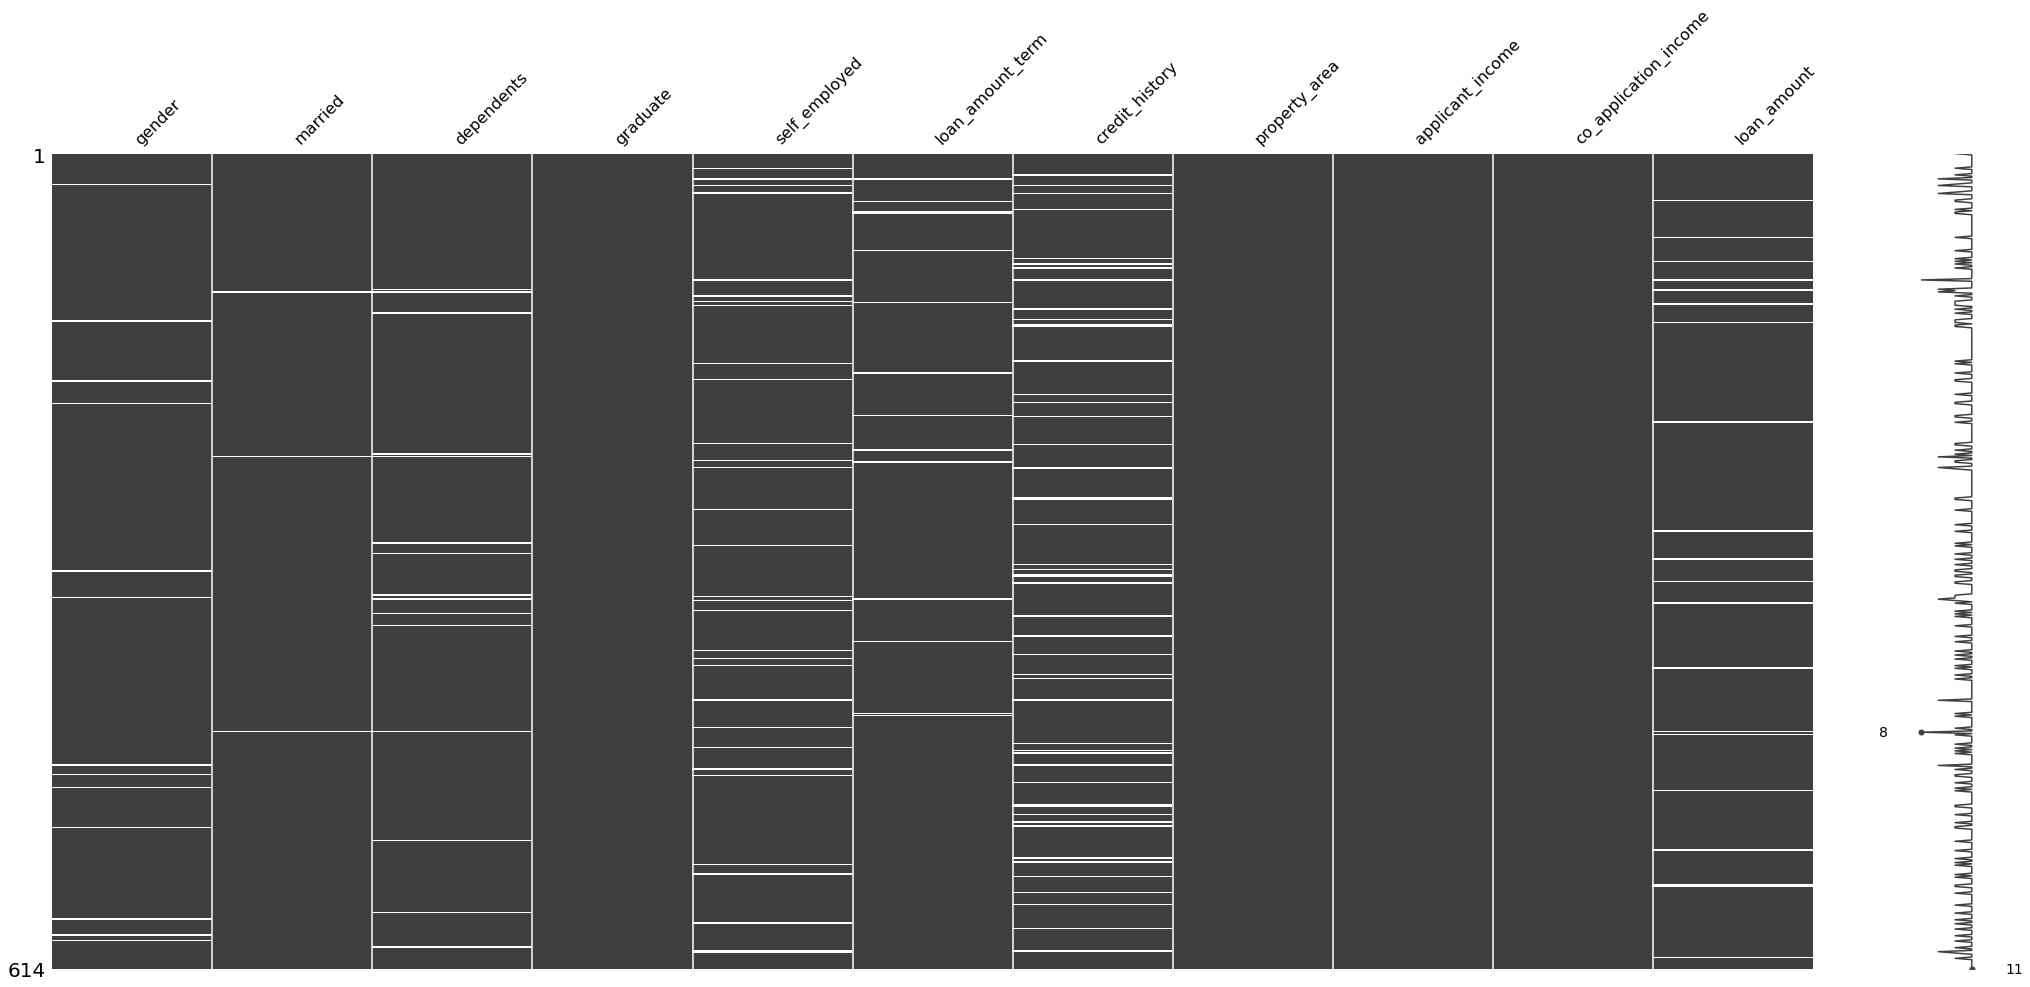

In [199]:
# Lets explore missing data
msno.matrix(df[cat_cols+num_cols], figsize=(35, 15))

Correlation heatmap measures nullity correlation between columns of the dataset. It shows how strongly the presence or absence of one feature affects the other.

Nullity correlation ranges from(-1 to 1):

- -1 means if one column(attribute) is present, the other is almost certainly absent.
- 0 means there is no dependence between the columns(attributes).
- 1 means if one column(attributes) is present, the other is also certainly present.
Unlike in a familiar correlation heatmap, if you see here, many columns are missing. Those columns which are always full or always empty have no meaningful correlation and are removed from the visualization.

The heatmap is helpful for identifying data completeness correlations between attribute pairs, but it has the limited explanatory ability for broader relationships and no special support for really big datasets.

<AxesSubplot:>

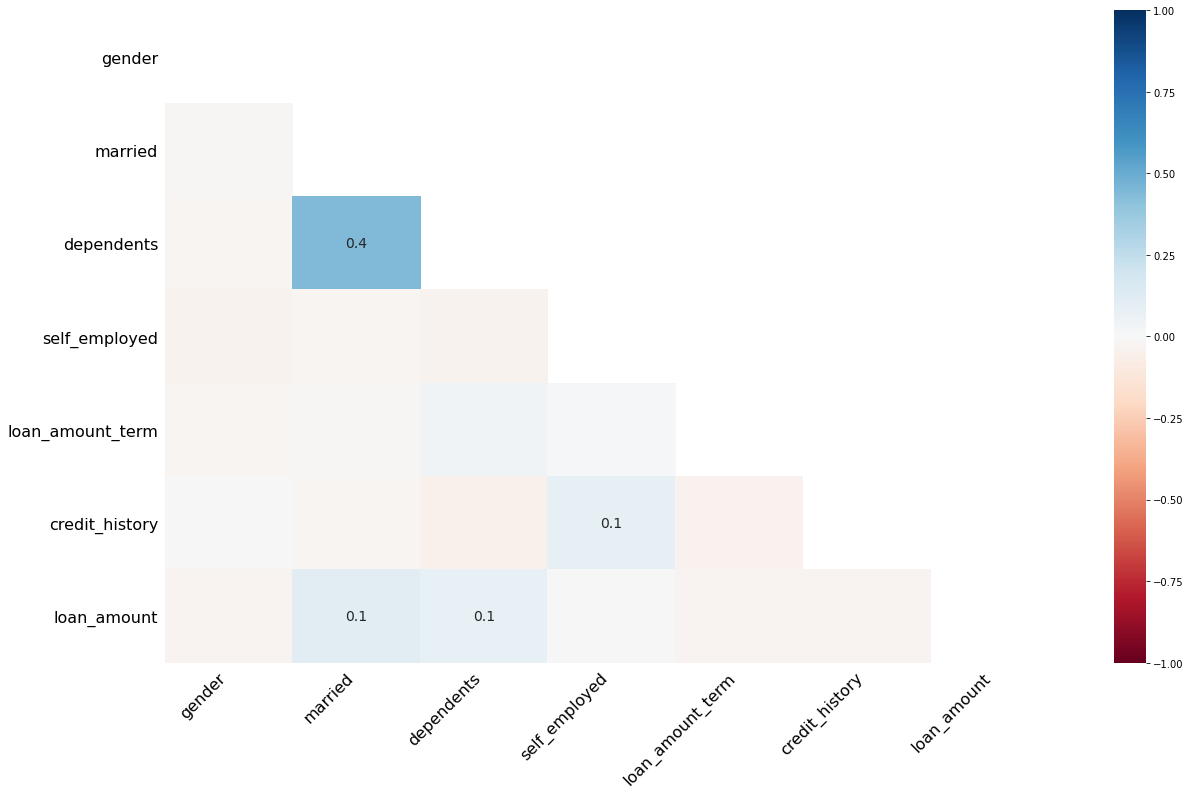

In [200]:
msno.heatmap(df[cat_cols+num_cols], labels=True)

From the above plot we can interpret relationships of missingness across few variables. There is a corralation of 0.4 between `dependents` and `married`, which makes sense as majority of times someone gets married first before having dependents. 

In [202]:
# Lets check where columns with missing data are related to eech other
missing_cols= [cols for cols in num_cols+cat_cols if df[cols].isnull().sum() > 0]
missing_cols

['loan_amount',
 'gender',
 'married',
 'dependents',
 'self_employed',
 'loan_amount_term',
 'credit_history']

<AxesSubplot:>

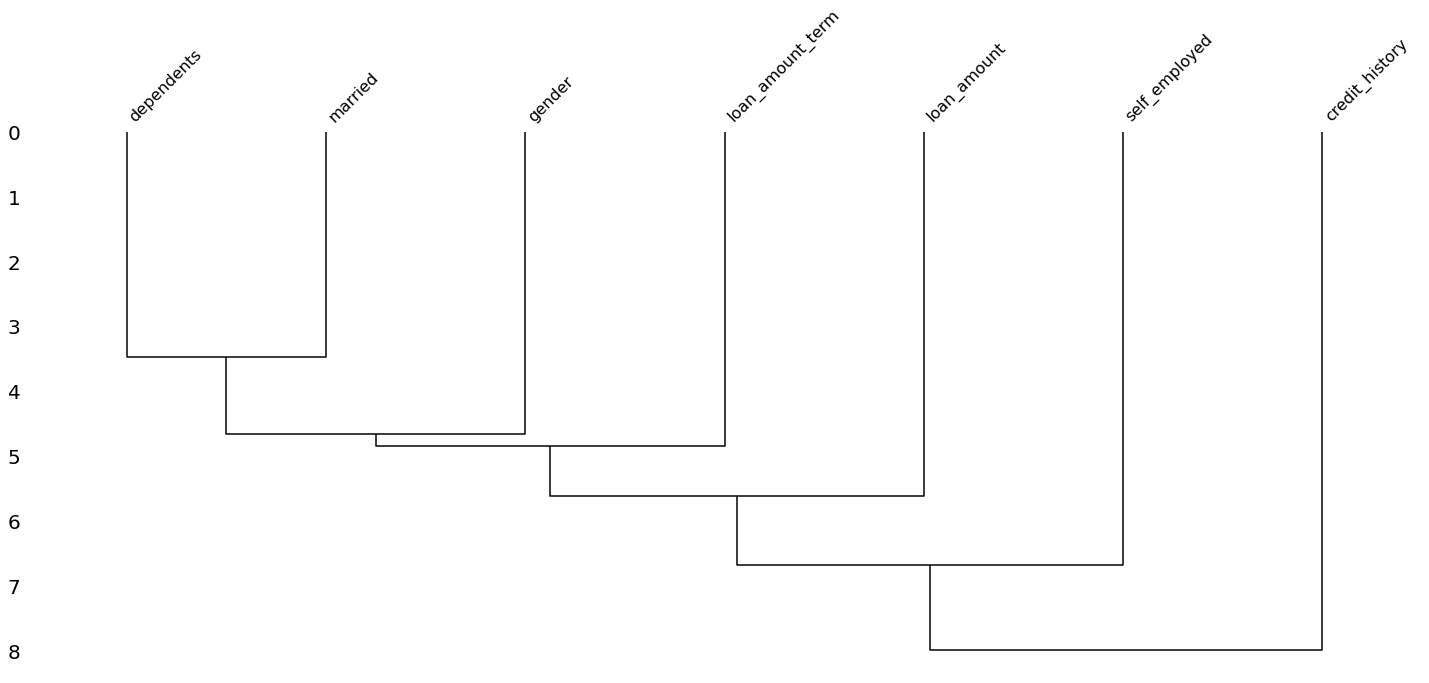

In [203]:
msno.dendrogram(df[missing_cols])

The dendogram method uses hierarchical clustering, and groups attributes together where missingness is associated with missingness of another variable or completeness is associated with completeness of another variable. We interpret the dendrogram based on a top-down approach, i.e., to focus on the height at which any two columns are connected together with matters of nullity. More the height, less will be the relation and vice versa is also True. For example missingness or presence of data in `credit_history` have no relationship with missingness or completeness of any other variable.

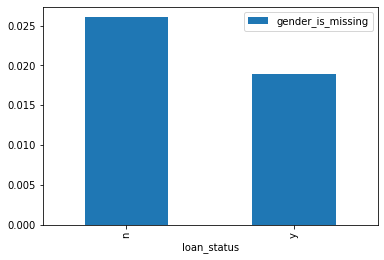

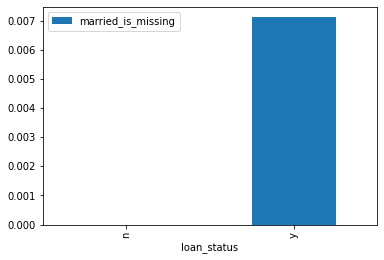

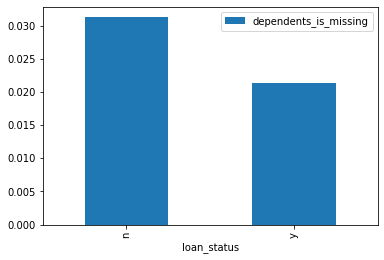

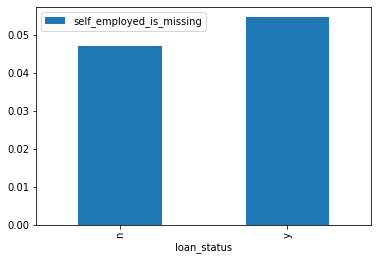

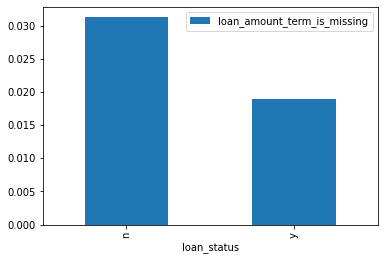

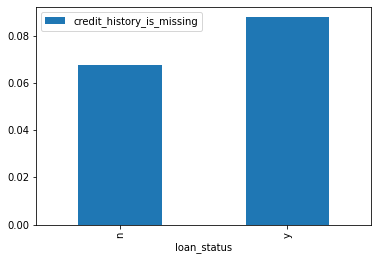

In [204]:
# Lets examine the missing categorical columns
cat_missing = [cols for cols in cat_cols if df[cols].isnull().sum() > 0]

def cat_missing_association_with_outcome(data, missing_data_column, outcome):
    """Function to plot missing association of categorical varibles with outcome"""
    
    df = data.copy()
    df[f"{missing_data_column}_is_missing"] = df[missing_data_column].isnull().astype(int)
    df.groupby([outcome]).agg({f"{missing_data_column}_is_missing": 'mean'}).plot.bar()
    
for cols in cat_missing:
    cat_missing_association_with_outcome(df, cols, target)

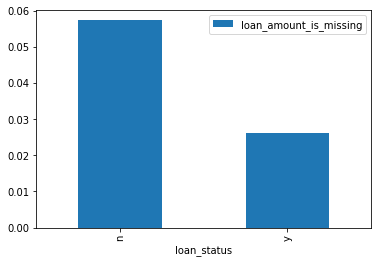

In [205]:
# Lets examine the missing numerical columns
num_missing = [cols for cols in missing_cols if cols not in cat_missing]

def num_missing_association_with_outcome(data, missing_data_column, outcome):
    """Function to plot missing association of categorical varibles with outcome"""
    
    df = data.copy()
    df[f"{missing_data_column}_is_missing"] = df[missing_data_column].isnull().astype(int)
    df.groupby([outcome]).agg({f"{missing_data_column}_is_missing": 'mean'}).plot.bar()


for cols in num_missing:
    num_missing_association_with_outcome(df, cols, target)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Now the dataset is scaled and all variables have a z score
df_num.head()

In [ ]:
# Bulding the Random forest imputation framework
random_forest_imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=100, random_state=0, bootstrap=True, n_jobs=-1),
                           max_iter=10,
                           random_state=0)
# Imputing 
df_imputed = random_forest_imputer.fit_transform(df_num)

In [ ]:
# Reverse transformation to get back the original values
df_imputed = pd.DataFrame(columns=num_columns, data=df_imputed)
df_imputed.head()

In [ ]:
# Lets check the distribution of original and compare with the ml imputed
df_imputed['loan_amount'].plot.kde(color='orange', label='loan_amount_random_forest_imputed',linewidth=2, legend=True)
df['loan_amount'].plot.kde(color='b', label='loan_amount', legend=True, linewidth=2, figsize=(9,7), alpha=0.5)

In [ ]:
# Lets compare the standard deviations
round(df.loan_amount.std(),2), round(df.loan_amount_random_imputed.std(),2), round(df_imputed.loan_amount.std(),2)

In [ ]:
# Lets check the correlation with other variables
df['loan_amount_random_forest_imputed'] = df_imputed.loan_amount
df[['loan_amount', 'loan_amount_median_imputed','loan_amount_random_imputed', 'loan_amount_random_forest_imputed', 'applicant_income']].corr()

The standard deviation is slightly below random imputation however, it can be observed the correlation with the `application_income` is better and closer, when compared to random imputation method. Hence MICE is a better method than median imputation as standard deviation and overall distribution is preserved, as well as less impact on correlation with other variables

In [ ]:
# We can drop the columns with imputed suffix since we used these to illustrate the effects of different imputation methods
df.drop(['loan_amount_median_imputed','loan_amount_random_imputed', 'loan_amount_random_forest_imputed'], axis=1, inplace=True)

In [ ]:
# Now its time to impute Categorical variables, and we will combine this with numerical data imputation

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_temp = df.copy()
lb = LabelEncoder()

# Only encoding columns that don't have a numerical value
cat_cols_string_encoded = cat_columns

# Extracting the classes to which each value of a column will be encoded to
label_encoder_mapping = {}
for cols in cat_cols_string_encoded:
    classes = df_temp[cols].unique()
    classes = list(np.sort(classes[~pd.isna(classes)]))
    label_encoder_mapping[cols] = classes

    
# The label encoder under the hood will encode values from 0 to n-1 (n being number of unique values in the column)
# The encoder out of the box does not provide the encoded mappings
# We need these, post imputation to return the categorical variable to its original value
for key, val in label_encoder_mapping.items():
    index = 0
    val_mapping = {}
    for value in val:
        val_mapping[index] = value
        index += 1
    label_encoder_mapping[key] = val_mapping
    
# Encoding the data
df_temp[cat_cols_string_encoded] = df_temp[cat_cols_string_encoded].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))

In [ ]:
# Getting the ordinal columns as we dont need to label encode these. Filtering the year column since its values are constant
ordinal_columns = [cols for cols in df_temp if cols not in cat_cols_string_encoded + num_columns + [id_col, target]]

# Combining the columns as it is recommended use all the data to impute with MICE framework
columns = [cols for cols in cat_cols_string_encoded + ordinal_columns + num_columns]

In [ ]:
# Creating a temp dataframe and running Mice
df_temp_ = df_temp[columns].copy()

# Bulding the Random forest imputation framework for categorical variables
rf_imp = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=100, random_state=0, bootstrap=True, n_jobs=-1),
                           max_iter=20,
                           random_state=0)
# Imputing 
df_imputed = rf_imp.fit_transform(df_temp_)

In [ ]:
# Unscaling the values to get back the original values
df_imputed_ = pd.DataFrame(columns=columns, data=df_imputed)

# converting to int, as since mappings are tied to integers
df_imputed_[cat_cols_string_encoded + ordinal_columns] = df_imputed_[cat_cols_string_encoded+ordinal_columns].astype('int')

# Remapping to the original categorical values
for key, val in label_encoder_mapping.items():
    df_imputed_[key] = df_imputed_[key].map(val)

In [ ]:
# Lets check whether the values have been imputed
df_imputed_.isnull().sum()

We can now use the above steps and make it into Scikit learn pipeline, as using a pipeline we can define the sequence of steps, and also save these steps as a pickle object. By utilising this practice we maintain machine learning system best practices, and can ensure reliability and reproucability, without replicating the code in the inference setting.

In [ ]:
# Now we have imputed the data lets bring it all together and ensure all the values are imputed
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from typing import List
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns],df[target].map({'y':1, 'n':0}) , test_size=0.1, random_state=0, stratify=df[target].map({'y':1, 'n':0}))

Encoding the categorical variables into rare labels if they dont meet threshold, i.e. if the cardinality is too low, i.e. where a category makes 1 percent of the feature values. This ensures that training data sees
the rare values and model is not overfiltted, and is generalised.
We fill first impute the missing data using Mice technique and then check for rare labels

In [ ]:
for cols in cat_cols_string_encoded:
    print(cols)
    print(df[cols].value_counts(normalize=True))
    print()

In [ ]:
def cat_encoder_mapping(df: pd.DataFrame, columns: List[str]) -> dict:
    """Function is a helper function for label encoder and builds a mapping for categorical variables
       The function returns the mapping so encoded variables can be decoded to original form"""
    
    
    # Extracting the classes to which each value of a column will be encoded to
    label_encoder_mapping = {}
    for cols in columns:
        classes = df[cols].unique()
        classes = list(np.sort(classes[~pd.isna(classes)])) #exluding na's from the list
        label_encoder_mapping[cols] = classes


    # The label encoder under the hood will encode values from 0 to n-1 (n being number of unique values in the column)
    # The encoder out of the box does not provide the encoded mappings
    # We need these, post imputation to return the categorical variable to its original value
    for key, val in label_encoder_mapping.items():
        index = 0
        val_mapping = {}
        for value in val:
            val_mapping[index] = value
            index += 1
        label_encoder_mapping[key] = val_mapping
        
    return label_encoder_mapping


class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    """Class to bulk encode categorical variables"""
    
    def __init__(self, cat_columns: List[str]):
        """Constructor"""
        
        self.cat_columns = cat_columns
        self.label_encoder_mapping = {}
    
    def fit(self, X, y=None):
        """Custom fit function"""
        
        self.label_encoder_mapping = cat_encoder_mapping(df=X, columns=self.cat_columns)
        return self
    
    def transform(self, X, y=None):
        """Custom transformer"""
        
        # Encoding the data
        X = X.copy()
        X[self.cat_columns] = X[self.cat_columns]\
                              .apply(lambda series: pd.Series(
                                      LabelEncoder().fit_transform(series[series.notnull()])
                                     ,index=series[series.notnull()].index)
                                    )
        return X
    

class CustomLabelDecoder(BaseEstimator, TransformerMixin):
    """Class to decode the categorical columns based on mapping object"""
    
    def __init__(self, features: List[str], label_encoder_mapping: dict):
        """Constructor"""
        
        self.label_encoder_mapping = label_encoder_mapping
        self.features = features
        self.X_ = pd.DataFrame()
        
    def fit(self, X, y=None):
        """Custom fit function"""
        
        return self
    
    def transform(self, X, y=None):
        """Custom transform method"""
        
        X = X.copy()
        
        self.X_ = pd.DataFrame(data=X, columns=self.features)
        
        for key, val in self.label_encoder_mapping.items():
            self.X_[key] = self.X_[key].astype(int)
            self.X_[key] = self.X_[key].map(val)
        
        return self.X_

In [ ]:
# Running the encoder pipeline
encoder_pipeline = Pipeline(
    steps=[
        ('cat_encoding', 
          CustomLabelEncoder(cat_columns=cat_cols_string_encoded)
        )
    ]
)

X_train_encoded = encoder_pipeline.fit_transform(X_train)
X_test_encoded = encoder_pipeline.transform(X_test)

In [ ]:
# Running the custom imputer pipeline as scikit learn pipeline and decoding the categories which were encoded into numerical form
custom_preprocessor = Pipeline(
    steps=[('mice_imputation',
           IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0, bootstrap=True, n_jobs=-1),
                           max_iter=20,
                           random_state=0)
           ),
           ('custom_label_decoder',
            CustomLabelDecoder(features=columns, 
                               label_encoder_mapping=encoder_pipeline.named_steps['cat_encoding'].label_encoder_mapping)),
           ('rare_label_encoder', 
            RareLabelEncoder(tol=0.02, n_categories=8, variables=cat_cols_string_encoded, replace_with='rare'))
           ]
)

custom_transformer = ColumnTransformer(transformers=
    [
        ("all_features", custom_preprocessor, columns)
    ]
)

custom_pipeline = Pipeline(
    steps=[(
        "custom_transformer", custom_transformer
    )]
)

X_train_imputed = custom_pipeline.fit_transform(X_train_encoded)
X_test_imputed = custom_pipeline.transform(X_test_encoded)

Once data is imputed then we can one hot encode categorical data and pass the numerical data as is. In python we can leverage DictVectorizor to do both, but first we may need to convert the data into dictionary. For that we will use `pandas.to_dict()` method

In [ ]:
custom_pipeline.named_steps['custom_transformer'].transformers_[0][2]
X_train_dict = pd.DataFrame(data=X_train_imputed, columns=features).to_dict(orient='records')
X_test_dict = pd.DataFrame(data=X_test_imputed, columns=features).to_dict(orient='records')

In [ ]:
# Apply the dictvectorizor to one hot encode
dv = DictVectorizer(sparse=False)
X_train_transformed = dv.fit_transform(X_train_dict)
X_test_transformed = dv.transform(X_test_dict)

In [ ]:
pd.DataFrame(X_train_transformed, columns=dv.get_feature_names()).columns

In [ ]:
# Lets train the model and check the score. But before lets check the class imbalance. 
y_train.mean(), y_test.mean()

Because classes are slightly imbalanced, we can use the `class_weight='balanced'` option, since this option uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data when training the algorithm

In [ ]:
# Training the model using cross validation to ensure model is generalisable and can be used in a good setting
d_param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,20],
    'min_samples_leaf' : [1,3,5,10,15,20,25,30],
    'criterion' : ['gini', 'entropy'],
    'random_state' : [0], 
    'class_weight' : ['balanced', None]
}
d_clf = DecisionTreeClassifier()


# Training the models
d_clf_cv = GridSearchCV(estimator=d_clf, param_grid=d_param_grid, cv=5, scoring='roc_auc')
d_clf_cv.fit(X_train_transformed, y_train)

print("Decision tree optimised")


d_best_params = d_clf_cv.best_params_

print(f"Getting the best params which are {d_best_params}")

model = DecisionTreeClassifier(**d_best_params)
model.fit(X_train_transformed, y_train)

training_predictions_prob = model.predict_proba(X_train_transformed)
testing_predictions_prob = model.predict_proba(X_test_transformed)

training_predictions = model.predict(X_train_transformed)
testing_predictions = model.predict(X_test_transformed)

training_roc_auc = roc_auc_score(y_train, training_predictions_prob[:,1])
testing_roc_auc = roc_auc_score(y_test, testing_predictions_prob[:,1])

training_acc = accuracy_score(y_train, training_predictions)
testing_acc = accuracy_score(y_test, testing_predictions)

print(f"Training roc is {training_roc_auc}, and testing roc is {testing_roc_auc} \n \
        training accuracy is {training_acc}, testing_acc as {testing_acc}")

In [ ]:
pd.DataFrame(X_train_transformed, columns=dv.get_feature_names()).head()

In [ ]:
# We can see both training and testing roc is high, i.e. model is generalisable and not overfitted or underfitted

Lets take a counter intuitive approach and check if we just used mean/median to impute the numerical variables, and imputed categorical variables with most frequent occurences, what results we shall get

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns],df[target].map({'y':1, 'n':0}) , test_size=0.1, random_state=0, stratify=df[target].map({'y':1, 'n':0}))

In [ ]:
X_train.head()

In [ ]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_median", MeanMedianImputer(imputation_method='median', variables=num_missing)),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_frequent",
            CategoricalImputer(imputation_method='frequent', variables=cat_missing),
        ),
        (
            'rare_label_encoder', 
            RareLabelEncoder(tol=0.02, n_categories=8, variables=cat_cols_string_encoded, replace_with='rare')
        )
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_cols_string_encoded),
        ("numerical", numeric_preprocessor, num_columns + ordinal_columns),
    ]
)

preprocessor_pipeline = Pipeline(
    steps=[(
        'preprocessor', preprocessor
    )]
)

In [ ]:
X_train_imputed = preprocessor_pipeline.fit_transform(X_train)
X_test_imputed = preprocessor_pipeline.transform(X_test)

In [ ]:
X_train_dict = pd.DataFrame(data=X_train_imputed, columns=features).to_dict(orient='records')
X_test_dict = pd.DataFrame(data=X_test_imputed, columns=features).to_dict(orient='records')

# Apply the dictvectorizor to one hot encode
dv = DictVectorizer(sparse=False)
X_train_transformed = dv.fit_transform(X_train_dict)
X_test_transformed = dv.transform(X_test_dict)

In [ ]:
# Training the model using cross validation to ensure model is generalisable and can be used in a good setting
d_param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,20],
    'min_samples_leaf' : [1,3,5,10,15,20,25,30],
    'criterion' : ['gini', 'entropy'],
    'random_state' : [0], 
    'class_weight' : ['balanced', None]
}
d_clf = DecisionTreeClassifier()


# Training the models
d_clf_cv = GridSearchCV(estimator=d_clf, param_grid=d_param_grid, cv=5, scoring='roc_auc')
d_clf_cv.fit(X_train_transformed, y_train)

print("Decision tree optimised")


d_best_params = d_clf_cv.best_params_

print(f"Getting the best params which are {d_best_params}")

model = DecisionTreeClassifier(**d_best_params)
model.fit(X_train_transformed, y_train)

training_predictions_prob = model.predict_proba(X_train_transformed)
testing_predictions_prob = model.predict_proba(X_test_transformed)

training_predictions = model.predict(X_train_transformed)
testing_predictions = model.predict(X_test_transformed)

training_roc_auc = roc_auc_score(y_train, training_predictions_prob[:,1])
testing_roc_auc = roc_auc_score(y_test, testing_predictions_prob[:,1])

training_acc = accuracy_score(y_train, training_predictions)
testing_acc = accuracy_score(y_test, testing_predictions)

print(f"Training roc is {training_roc_auc}, and testing roc is {testing_roc_auc} \n \
        training accuracy is {training_acc}, testing_acc as {testing_acc}")

In [ ]:
dv.get_feature_names()